In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#veri setini yazalım ve ilk 5 satırını görelim.
cols = ["sepal_lenght", "sepal_width","petal_lenght","petal_width","class"]
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',names=cols)
df.head()

,sepal_lenght,sepal_width,petal_lenght,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.describe()

,sepal_lenght,sepal_width,petal_lenght,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


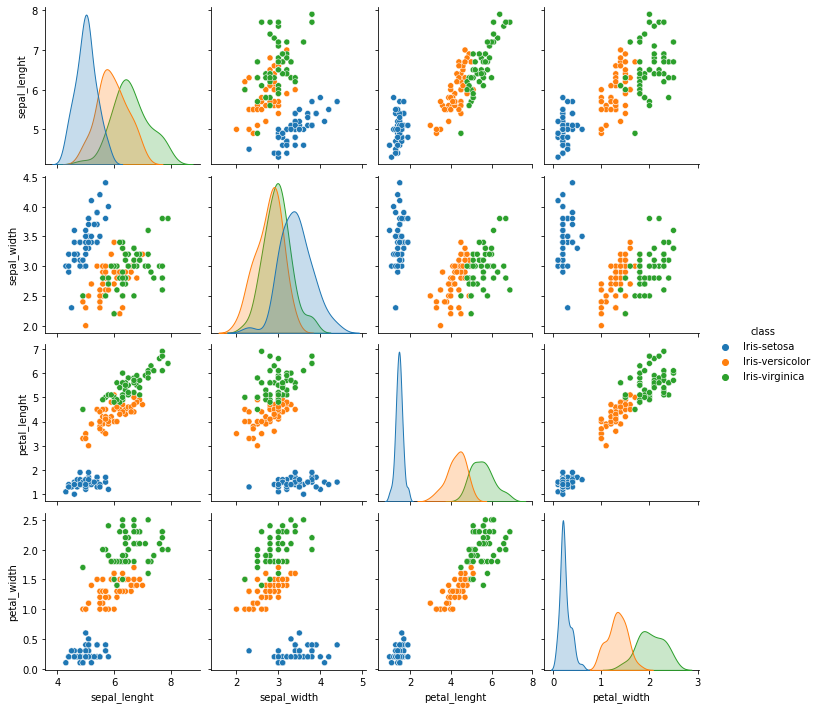

In [ ]:
sns.pairplot(df, hue='class')

<Axes: >

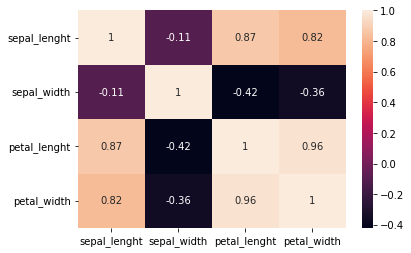

In [ ]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
#ön işleme
df['class_encod'] = df['class'].apply(lambda x: 0 if x == 'Iris-setosa' else 1 if x == 'Iris-versicolor' else 2)
df['class_encod'].unique()

array([0, 1, 2])

In [ ]:
#verilerimizi ön işlemeden geçirdikten sonra, iris örneklerini sınıflandırmak için makine öğrenimi modeli oluşturuyoruz
#ilk adım dataframemizi girdi niteliklerine ve hedef niteliklere bölmek, sütunları ayırarak bölme

y = df[['class_encod']] #hedef değişken
X = df.iloc[:, 0:4]
X.head()

,sepal_lenght,sepal_width,petal_lenght,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
#verileri satırlara ayırdık
#train_test_split() metodu, eğitim verilerinde ve test verilerinde x ve y dataframelerini böler.


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=0, stratify=y)

np.shape(y_train)

(105, 1)

* Ardından, sklearn tarafından sağlanan naive bayes sınıfını GaussianNB sınıflandırıcısı oluşturmak için X_train ve y_train veri kümelerini kullanırız. Makine  öğrenimi algoritması zaten kitaplık tarafından uygulandığından, tek yapmamız gereken X_train ve y_train veri kümelerini argüman olarak ileterek fit() yöntemini çağırmak.

In [ ]:
#Model Select
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.naive_bayes import GaussianNB


In [ ]:
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)


In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score


cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall = recall_score(y_test, Y_pred,average='micro')
f1= f1_score(y_test,Y_pred, average='micro')
print("Confusion matrix for Naive Bayes\n",cm)
print("accuracy_Naive Bayes: %.3f" %accuracy)
print("precision_Naive Bayes: %.3f" %precision)
print("recall_Naive Bayes: %.3f" %recall)
print("f1-score_Naive Bayes : %.3f" %f1)

Confusion matrix for Naive Bayes
 [[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
accuracy_Naive Bayes: 0.978
precision_Naive Bayes: 0.978
recall_Naive Bayes: 0.978
f1-score_Naive Bayes : 0.978
